Compile Status
-------------------------------
Loss= BCEWithLogitsLoss() 

Optimizer= Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
) 

Metrics= ['dice_score', 'loss'] 


Data Status
-------------------------------
Batch Shape of Training Features: (1, 128, 128, 64) torch.float32
Batch Shape of Training Labels: (1, 128, 128, 64) torch.float32

Testing After Random Initialization
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
Total Loss: 0.557803750038147

Loading Pretrained Model
-------------------------------
=> Loading checkpoint

Testing After Loading Pretrained Weights
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
Total Loss: 0.01952197775244713

Training
-------------------------------
Epoch 1
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Bat

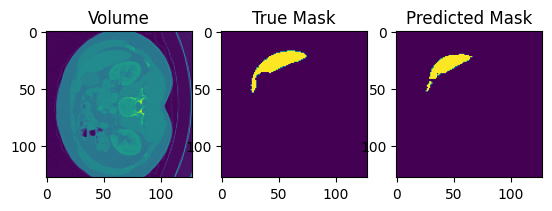

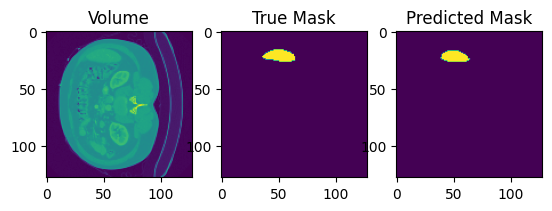

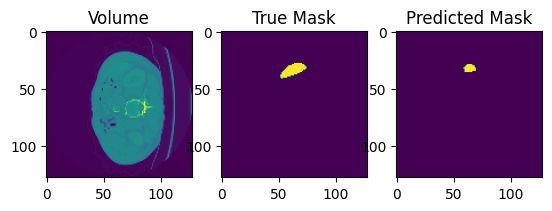

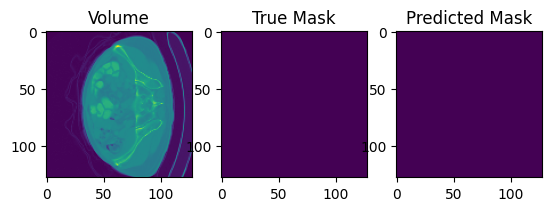

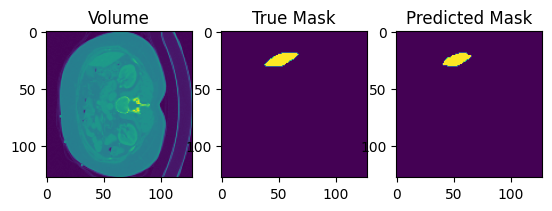

3D Loss: 0.021710452251136304
Epoch 6
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.017411187663674353
Epoch 7
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.015339537523686886
Epoch 8
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.013824084401130676
Epoch 9
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.012649428099393845
Epoch 10
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5


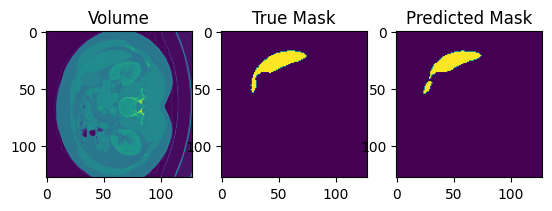

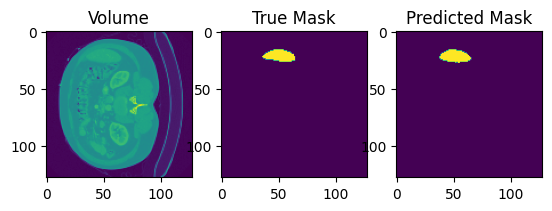

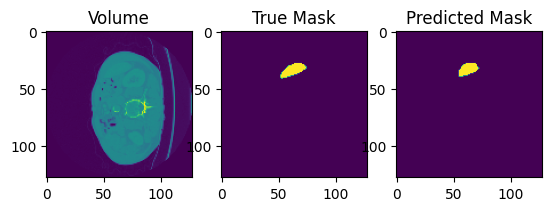

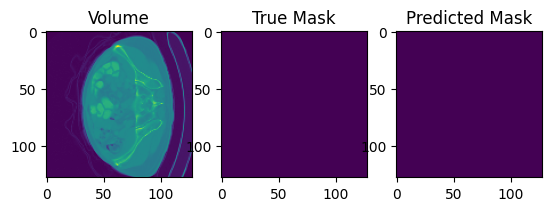

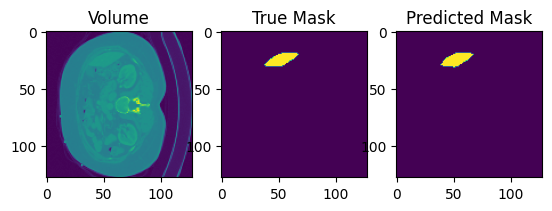

3D Loss: 0.01146060498431325
Epoch 11
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.0110044133849442
Epoch 12
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.010127566754817963
Epoch 13
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.010067078284919262
Epoch 14
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.009417178761214017
Epoch 15
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5


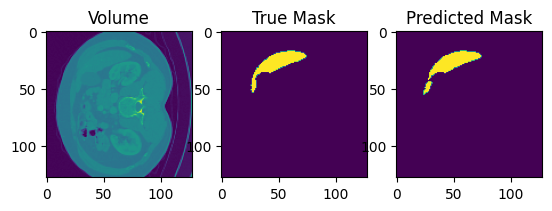

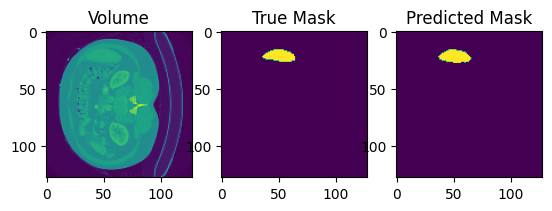

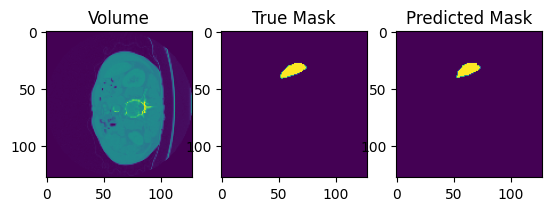

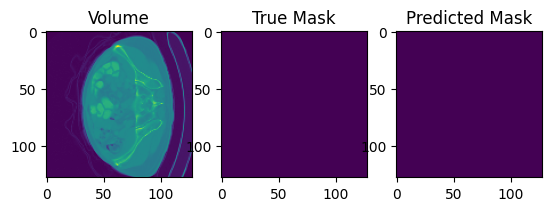

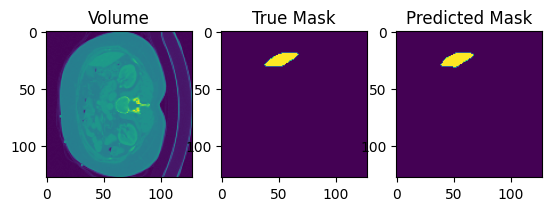

3D Loss: 0.009367204923182725
Epoch 16
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.009165348950773478
Epoch 17
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.008691786881536245
Epoch 18
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.009093928802758455
Epoch 19
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.008668092358857394
Epoch 20
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5


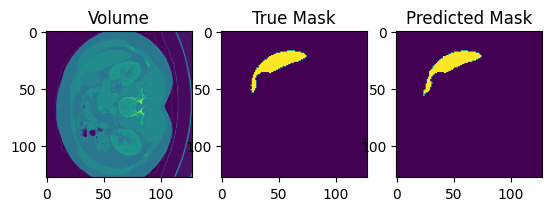

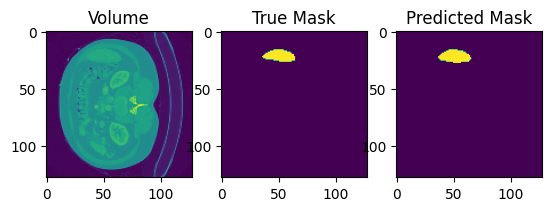

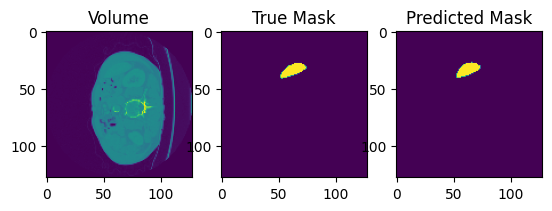

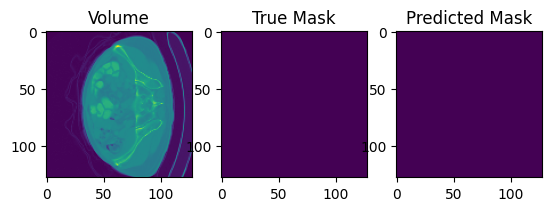

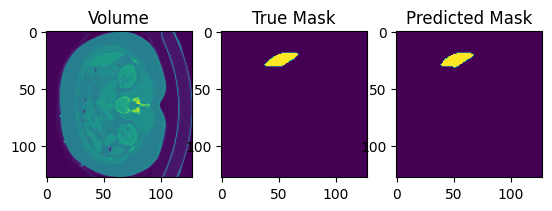

3D Loss: 0.008261757716536523
Epoch 21
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.008177304361015558
Epoch 22
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.008683844655752181
Epoch 23
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.00883014164865017
Epoch 24
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.008565811533480882
Epoch 25
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5


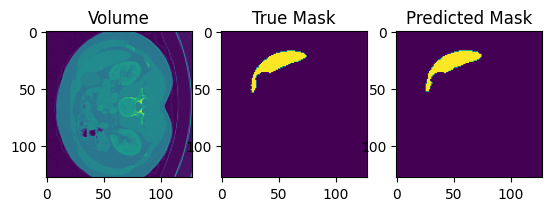

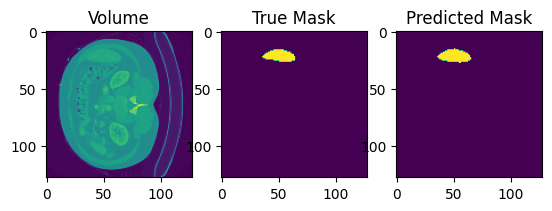

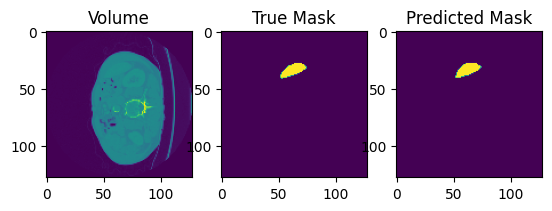

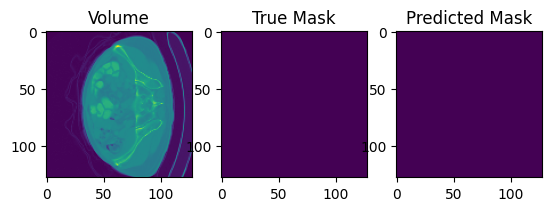

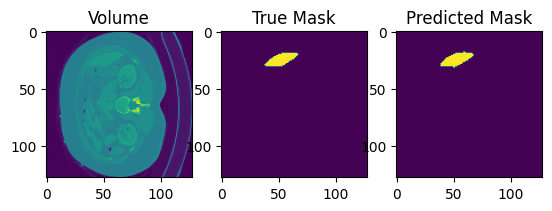

3D Loss: 0.008466208633035422
Epoch 26
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.008039630204439163
Epoch 27
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.007870228122919798
Epoch 28
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.008122364990413189
Epoch 29
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.007894755713641644
Epoch 30
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5


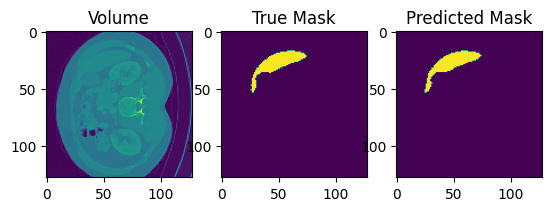

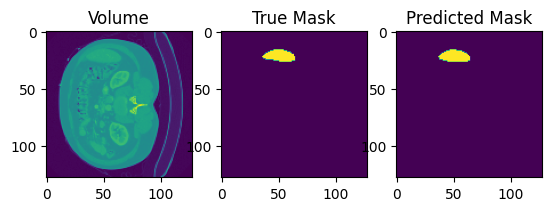

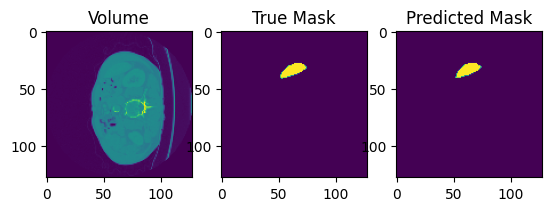

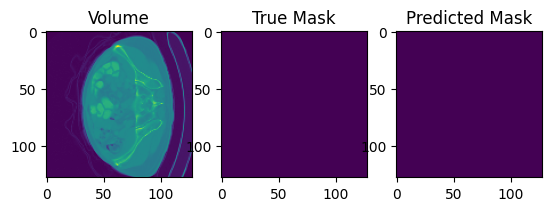

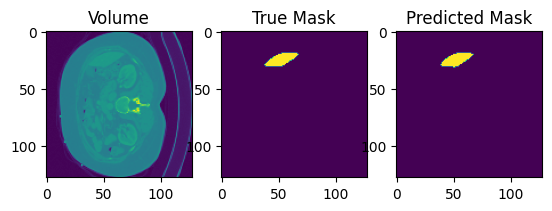

3D Loss: 0.007442255457863212
Epoch 31
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.0077862701378762725
Epoch 32
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.007531057018786669
Epoch 33
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.007467337744310498
Epoch 34
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.0069920126348733905
Epoch 35
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5


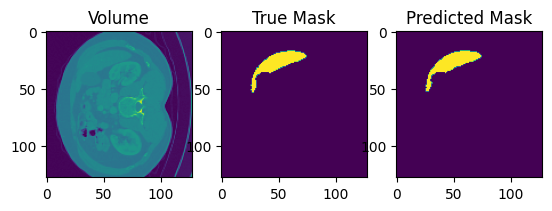

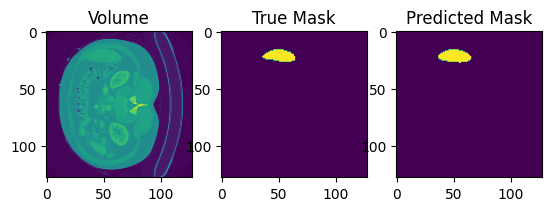

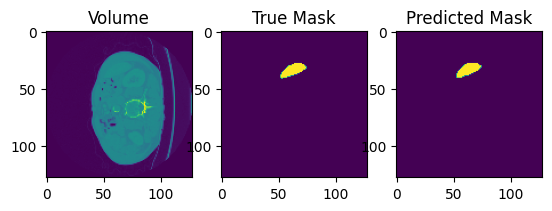

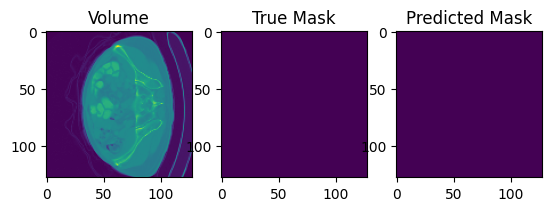

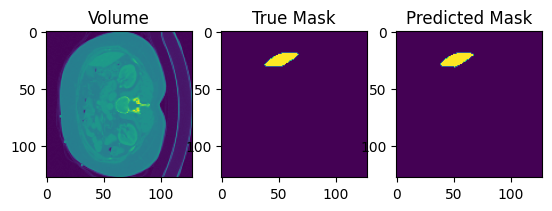

3D Loss: 0.007052874192595482
Epoch 36
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.007199647510424257
Epoch 37
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.0070241822861135
Epoch 38
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.007051581144332885
Epoch 39
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.006636621942743659
Epoch 40
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5


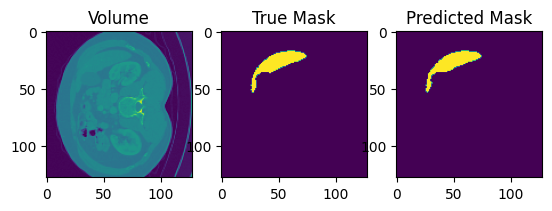

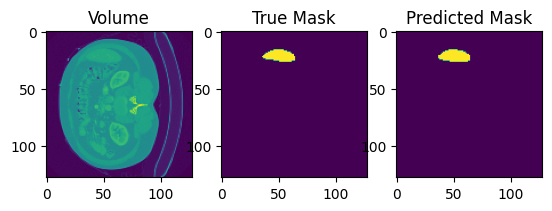

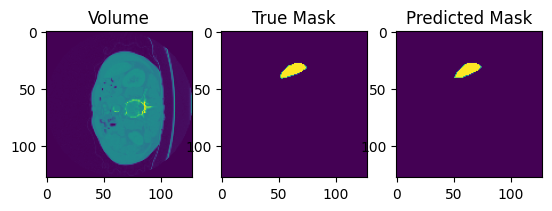

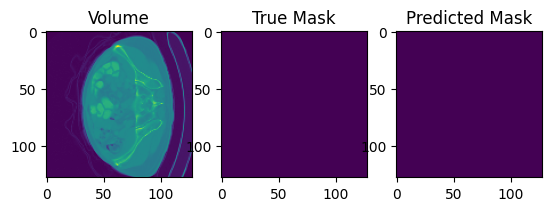

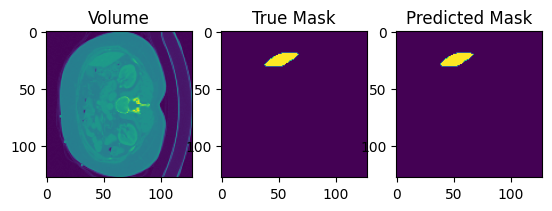

3D Loss: 0.006603632960468531
Epoch 41
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.006476160418242216
Epoch 42
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.006332725659012795
Epoch 43
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.006231808150187135
Epoch 44
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.006708473758772015
Epoch 45
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5


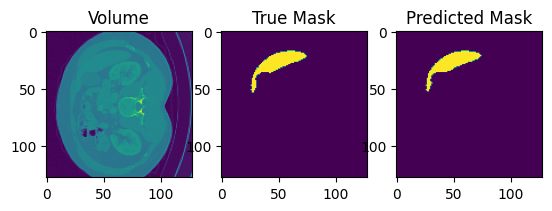

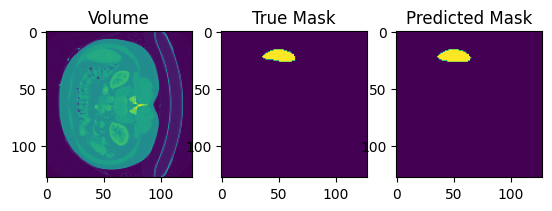

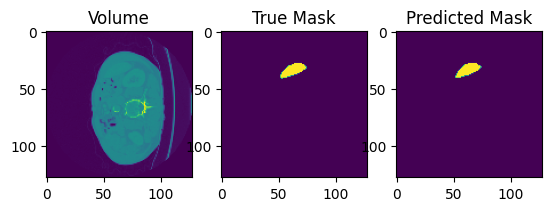

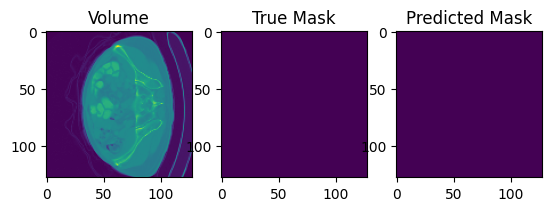

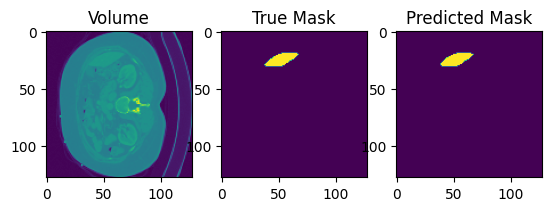

3D Loss: 0.006554215960204601
Epoch 46
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.006292335642501712
Epoch 47
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.006601764261722565
Epoch 48
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.006115153664723039
Epoch 49
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
3D Loss: 0.005876726703718305
Epoch 50
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5


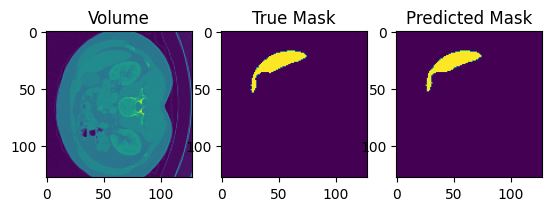

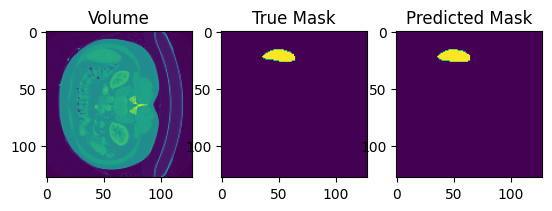

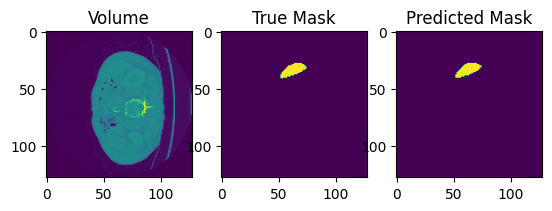

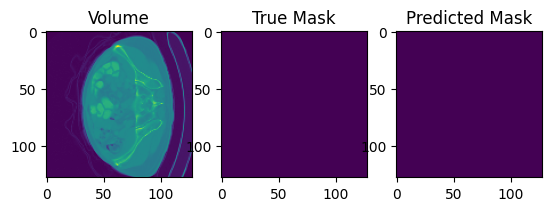

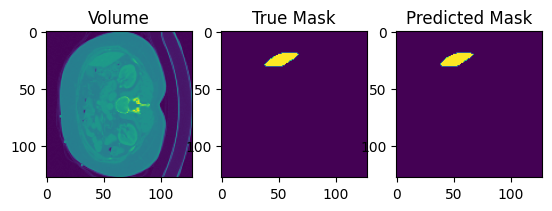

3D Loss: 0.0056953256018459795

Testing After Training
-------------------------------
Batch: 1/5
Batch: 2/5
Batch: 3/5
Batch: 4/5
Batch: 5/5
Total Loss: 0.005531375762075186


In [1]:
import unet
import losses
import engine
import torch
import json
import unet2d 
from torch import nn


class NeuralNetwork(unet2d.UNET,engine.Engine):
    def __init__(self):
        engine.Engine.__init__(self)
        unet2d.UNET.__init__(self)


with open('../config/configs.json') as f:
    config = json.load(f)


model=NeuralNetwork()
# losses.LossFunctions.choose(config["loss_function"])
# nn.BCEWithLogitsLoss()
model.compile(loss= nn.BCEWithLogitsLoss(), optimizer= torch.optim.Adam(model.parameters(),lr=config['optimizer']['learning_rate']), metrics=['dice_score','loss'])
print("Compile Status")
print("-------------------------------")
model.compile_status()

model.load_data(dataset_path=config['dataset']['Barbary'],transformation_flag=True,transformation=config['transformation_size'],batchsize=config['batch_size'],test_size=0)
print("\nData Status")
print("-------------------------------")
model.data_status()

print("\nTesting After Random Initialization")
print("-------------------------------")
model.evaluate_train2d()

print("\nLoading Pretrained Model")
print("-------------------------------")
model.load_checkpoint(config['checkpoint'])

print("\nTesting After Loading Pretrained Weights")
print("-------------------------------")
model.evaluate_train2d()

print("\nTraining")
print("-------------------------------")
model.fit2d(epochs=config['epochs'])

print("\nTesting After Training")
print("-------------------------------")
model.evaluate_train2d()

In [4]:
import torch

print("\nPrediction")
print("-------------------------------")
ImagePath=config['PredictPath']
# Image=torch.asarray(nib.load(ImagePath).get_fdata())
predicted_label,true_label,processed_volume=model.pred2d(ImagePath)
print(predicted_label.shape,true_label.shape,processed_volume.shape)


Prediction
-------------------------------
batch: 1/2
batch: 2/2
(2, 1, 128, 128, 64) (2, 1, 128, 128, 64) (2, 1, 128, 128, 64)


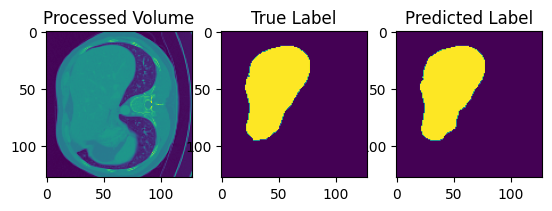

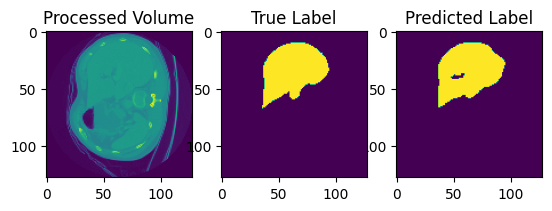

In [5]:
import matplotlib.pyplot as plt
slice=50
for i in range (predicted_label.shape[0]):
    volume_batch=processed_volume[i]
    plt.subplot(1,3,1)
    plt.imshow(volume_batch[0,:,:,slice])
    plt.title("Processed Volume")
    predicted_batch=predicted_label[i]
    plt.subplot(1,3,3)
    plt.imshow(predicted_batch[0,:,:,slice])
    plt.title("Predicted Label")
    true_batch=true_label[i]
    plt.subplot(1,3,2)
    plt.imshow(true_batch[0,:,:,slice])
    plt.title("True Label")
    plt.show()


In [8]:
import utils
volume_index=1
utils.overlay(volume=processed_volume[volume_index][0],true_mask=true_label[volume_index][0],predicted_mask=predicted_label[volume_index][0],fps=5,write_path="test_overlay.gif")



2022-11-21 06:41:45,760 - Animation.save using <class 'matplotlib.animation.PillowWriter'>


In [ ]:
import numpy as np
import nibabel as nib

ni_img = nib.Nifti1Image(np.asarray(output[0][0][0]), affine=np.eye(4))
nib.save(ni_img, "nifti_prediction.nii")

In [3]:
# # if model is better uncomment this line
# model.save_checkpoint(config['checkpoint'])

=> Saving checkpoint
